# **DEnsenet**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile
File_name='/content/drive/MyDrive/project/2500latest.zip'
with ZipFile(File_name,'r') as zip:
   zip.extractall()
   print('done')

done


In [3]:
import numpy as np
import seaborn as sns
#from keras_preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import os
print(os.listdir("/content/s2500latest/2500latest/"))
%matplotlib inline

['surprise', 'fear', 'neutral', 'happy', 'disgust', 'sad', 'angry']


In [4]:

!pip install split-folders
import splitfolders 
splitfolders.ratio("/content/s2500latest/2500latest/", output="/content/new2500/", seed=1337, ratio=(.8, .1, .1), group_prefix=None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 17500 files [00:03, 4973.36 files/s]


In [5]:
train_dir = '/content/new2500/train/'
test_dir = '/content/new2500/test/'
val_dir='/content/new2500/val/'

nb_classes = len(os.listdir('/content/new2500/train/'))
nb_classes


7

In [6]:
pic_size = 224

In [7]:
base_path = "/content/new2500/"

In [8]:

plt.figure(0, figsize=(12,20))
cpt = 0

<Figure size 864x1440 with 0 Axes>

<ipython-input-9-f2af4440e899>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


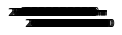

In [9]:
for expression in os.listdir(base_path + "train/"):
    for i in range(1,10):
        cpt = cpt + 1
        plt.subplot(432,288,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [10]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

2000 surprise images
2000 fear images
2000 neutral images
2000 happy images
2000 disgust images
2000 sad images
2000 angry images


In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
batch_size = 128

In [13]:
datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()
datagen_test= ImageDataGenerator()

In [14]:
Train_gen = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
Valid_gen = datagen_validation.flow_from_directory(base_path + "val",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
test_generator = datagen_test.flow_from_directory(base_path + "test",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 14000 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.


In [15]:
imageSize = 180

NUM_CLASSES = 7

In [16]:
Train_gen.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [17]:
import tensorflow as tf

In [18]:
model_densetnet = tf.keras.applications.DenseNet201(input_shape=(180,180,3),include_top=False,weights='imagenet',pooling='avg')
model_densetnet.trainable = False

74836368/74836368 [==============================] - 2s 0us/step


In [19]:
input = model_densetnet.input
# Rebuild top
x = tf.keras.layers.Dense(128,activation="relu")(model_densetnet.output)
x = tf.keras.layers.BatchNormalization()(x)
top_dropout_rate = 0.2
x = tf.keras.layers.Dropout(top_dropout_rate, name="top_dropout")(x)
output = tf.keras.layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(inputs=input, outputs=output)

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1/conv[0][0]']         

In [22]:
### we will train for 5 epochs only
hist = model.fit(
    Train_gen,
    epochs=50,
    validation_data=Valid_gen
)

Epoch 1/50
110/110 [==============================] - 118s 722ms/step - loss: 1.7470 - accuracy: 0.3556 - val_loss: 1.5307 - val_accuracy: 0.4440
Epoch 2/50
110/110 [==============================] - 66s 600ms/step - loss: 1.4089 - accuracy: 0.4896 - val_loss: 1.4172 - val_accuracy: 0.5103
Epoch 3/50
110/110 [==============================] - 67s 604ms/step - loss: 1.2554 - accuracy: 0.5664 - val_loss: 1.3882 - val_accuracy: 0.5097
Epoch 4/50
110/110 [==============================] - 66s 601ms/step - loss: 1.1726 - accuracy: 0.5964 - val_loss: 1.2388 - val_accuracy: 0.5674
Epoch 5/50
110/110 [==============================] - 66s 600ms/step - loss: 1.0991 - accuracy: 0.6231 - val_loss: 1.4081 - val_accuracy: 0.4806
Epoch 6/50
110/110 [==============================] - 66s 601ms/step - loss: 1.0501 - accuracy: 0.6485 - val_loss: 1.4602 - val_accuracy: 0.4954
Epoch 7/50
110/110 [==============================] - 66s 602ms/step - loss: 0.9965 - accuracy: 0.6679 - val_loss: 1.2569 - val_a

In [23]:
loss, accuracy = model.evaluate(test_generator)

14/14 [==============================] - 8s 522ms/step - loss: 0.8831 - accuracy: 0.7446


In [24]:
model.save("DenseNet201.h5")

In [25]:
'''''''model_json = con_model.to_json()''''
with open("model.json", "w") as json_file:
    json_file.write(model_json)'''''

NameError: ignored

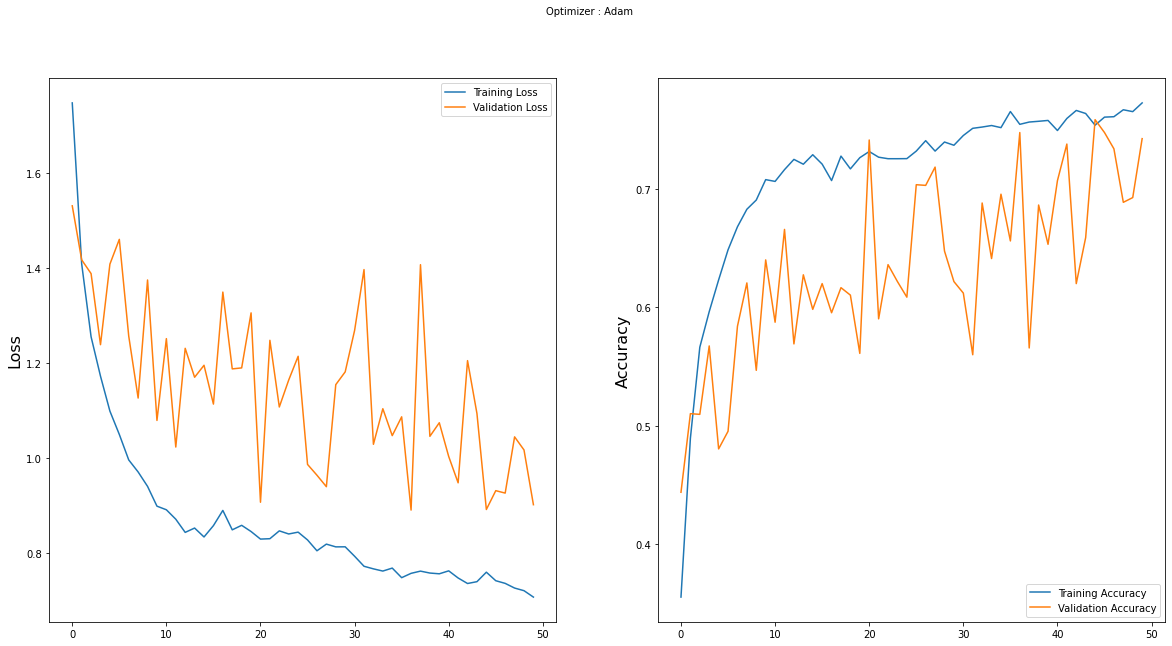

In [26]:
history=hist
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

<ipython-input-28-9e76cdb7efa6>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=test_generator)


<Figure size 432x288 with 0 Axes>

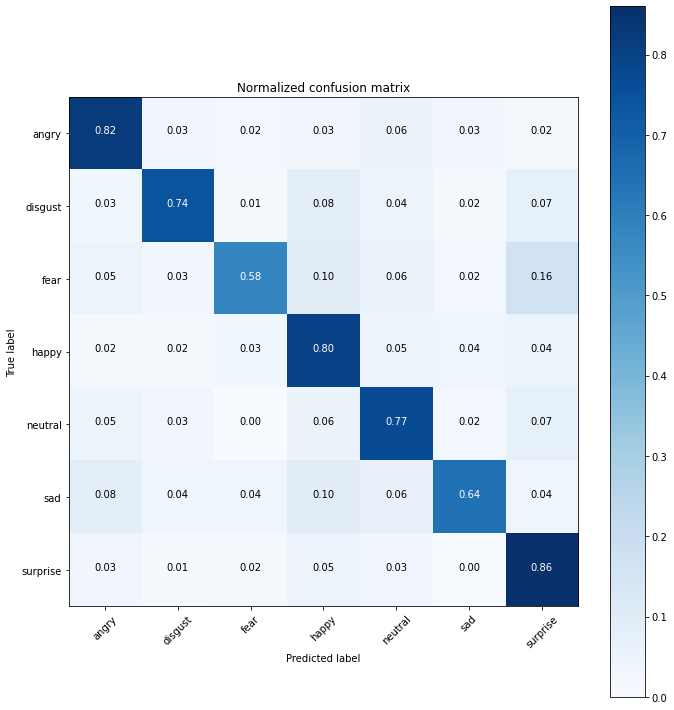

In [28]:
predictions = model.predict_generator(generator=test_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes
class_names = test_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [29]:
Train_gen.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [30]:
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [31]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [32]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
plt.show()

In [33]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report_dict)

,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
precision,0.756458,0.829596,0.833333,0.660066,0.721805,0.821429,0.678233,0.744571,0.757274,0.757274
recall,0.820000,0.740000,0.580000,0.800000,0.768000,0.644000,0.860000,0.744571,0.744571,0.744571
f1-score,0.786948,0.782241,0.683962,0.723327,0.744186,0.721973,0.758377,0.744571,0.743002,0.743002
support,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,0.744571,1750.000000,1750.000000
